# 1. 총 유틸리티 그래프

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv('agent_utility.csv')

# 넓은 그래프 크기 설정 (예: 24x8 인치)
fig_width, fig_height = 7.6 , 5


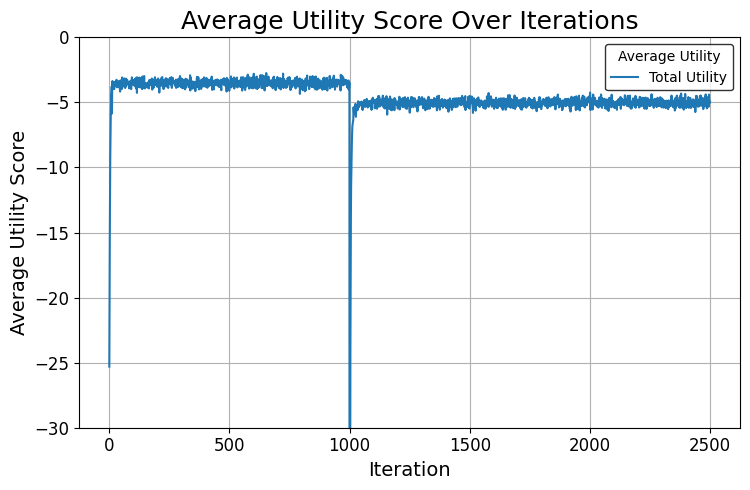

In [2]:
# 1. 반복별 총 유틸리티 (선 그래프)
df_total_utility = df.groupby('Iteration')['Total Utility'].mean()
fig, ax = plt.subplots(figsize=(fig_width, fig_height))
df_total_utility.plot(ax=ax, title="Average Utility Score Over Iterations")
ax.set_xlabel('Iteration')
ax.set_ylabel('Average Utility Score')
ax.set_ylim(-30, 0) 
ax.grid(True)

# 제목 폰트 크기만 변경
ax.title.set_fontsize(18)  # 제목 폰트 크기만 18로 설정

# x축 레이블 폰트 크기만 변경
ax.xaxis.label.set_fontsize(14)  # x축 레이블 폰트 크기만 14로 설정

# y축 레이블 폰트 크기만 변경
ax.yaxis.label.set_fontsize(14)  # y축 레이블 폰트 크기만 14로 설정

# x, y축 tick 레이블 크기만 조정
ax.tick_params(axis='both', labelsize=12)  # x, y축 tick 레이블 크기만 설정

ax.legend(
    title='Average Utility',
    loc='upper right',        # 그래프의 오른쪽 위
    bbox_to_anchor=(1, 1),    # 축 안쪽으로 위치 고정
    frameon=True,              # 범례에 테두리 추가
    facecolor='white',
    edgecolor='black'
)
plt.tight_layout()
plt.savefig('Average Utility Score Over Iterations.png', dpi=300, bbox_inches='tight')
plt.show()


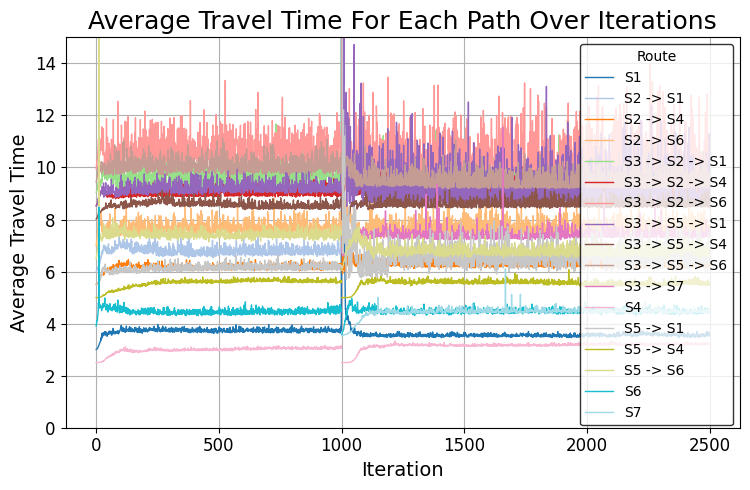

In [3]:
import matplotlib.cm as cm
import numpy as np

# 각 Iteration 별 경로(Route) 별 평균 Travel Time 계산
average_travel_time = df.groupby(["Iteration", "Route"])["Travel Time"].mean().unstack()

# 고유한 색상을 더 많이 사용하도록 설정
colors = cm.tab20(np.linspace(0, 1, len(average_travel_time.columns)))

# 그래프 그리기
fig, ax = plt.subplots(figsize=(fig_width, fig_height))
for i, column in enumerate(average_travel_time.columns):
    ax.plot(
        average_travel_time.index, 
        average_travel_time[column], 
        label=column, 
        linewidth=1, 
        color=colors[i]
    )

# 그래프 제목 및 레이블 설정
ax.set_title("Average Travel Time For Each Path Over Iterations")
ax.set_xlabel("Iteration")
ax.set_ylabel("Average Travel Time")
ax.set_ylim(0, 15)  # y축 범위 설정

# 제목 폰트 크기만 변경
ax.title.set_fontsize(18)  # 제목 폰트 크기만 18로 설정

# x축 레이블 폰트 크기만 변경
ax.xaxis.label.set_fontsize(14)  # x축 레이블 폰트 크기만 14로 설정

# y축 레이블 폰트 크기만 변경
ax.yaxis.label.set_fontsize(14)  # y축 레이블 폰트 크기만 14로 설정

# x, y축 tick 레이블 크기만 조정
ax.tick_params(axis='both', labelsize=12)  # x, y축 tick 레이블 크기만 설정

ax.grid(True)
ax.legend(
    title='Route',
    loc='upper right',        # 그래프의 오른쪽 위
    bbox_to_anchor=(1, 1),    # 축 안쪽으로 위치 고정
    frameon=True,              # 범례에 테두리 추가
    facecolor='white',
    edgecolor='black'
)

# 그래프 레이아웃 조정 및 저장
plt.tight_layout()
plt.savefig('Average Travel Time For Each Path Over Iterations.png', dpi=300, bbox_inches='tight')
plt.show()



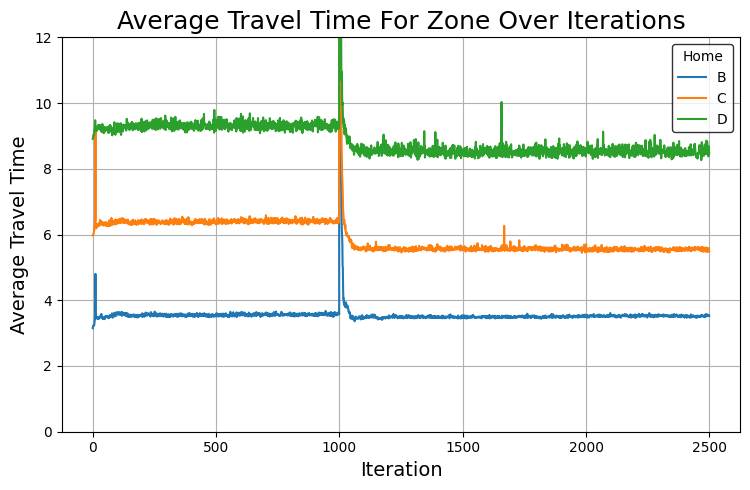

In [4]:
# 3. 반복별 구역당 평균 이동 시간 (선 그래프)
df_avg_travel_time = df.groupby(['Iteration', 'Home'])['Travel Time'].mean().unstack()
fig, ax = plt.subplots(figsize=(fig_width, fig_height))
df_avg_travel_time.plot(ax=ax, title="Average Travel Time For Zone Over Iterations")
ax.set_xlabel('Iteration')
ax.set_ylabel('Average Travel Time')
ax.set_ylim(0, 12)
# 제목 폰트 크기만 변경
ax.title.set_fontsize(18)  # 제목 폰트 크기만 18로 설정

# x축 레이블 폰트 크기만 변경
ax.xaxis.label.set_fontsize(14)  # x축 레이블 폰트 크기만 14로 설정

# y축 레이블 폰트 크기만 변경
ax.yaxis.label.set_fontsize(14)  # y축 레이블 폰트 크기만 14로 설정

ax.legend(
    title='Home',
    loc='upper right',        # 그래프의 오른쪽 위
    bbox_to_anchor=(1, 1),    # 축 안쪽으로 위치 고정
    frameon=True,              # 범례에 테두리 추가
    facecolor='white',
    edgecolor='black'
)
ax.grid(True)
plt.tight_layout()
plt.savefig('Average Travel Time For Zone Over Iterations.png', dpi=300, bbox_inches='tight')
plt.show()

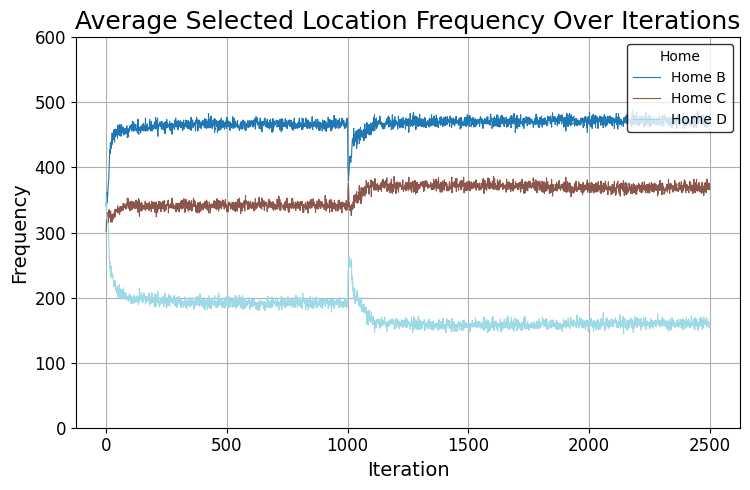

In [5]:
# 각 Iteration 별 Location의 선택 빈도 계산
home_frequency = df.groupby(["Iteration", "Home"]).size().unstack(fill_value=0)

# 고유한 색상을 더 많이 사용하도록 설정
colors = cm.tab20(np.linspace(0, 1, len(home_frequency.columns)))

# 그래프 그리기
fig, ax = plt.subplots(figsize=(fig_width, fig_height))
for i, column in enumerate(home_frequency.columns):
    ax.plot(
        home_frequency.index, 
        home_frequency[column], 
        label=f"Home {column}", 
        linewidth=0.8, 
        color=colors[i]
    )
    
ax.set_title("Average Selected Location Frequency Over Iterations")
ax.set_xlabel("Iteration")
ax.set_ylabel("Frequency")
ax.set_ylim(0, 600)
ax.grid(True)
# 제목 폰트 크기만 변경
ax.title.set_fontsize(18)  # 제목 폰트 크기만 18로 설정

# x축 레이블 폰트 크기만 변경
ax.xaxis.label.set_fontsize(14)  # x축 레이블 폰트 크기만 14로 설정

# y축 레이블 폰트 크기만 변경
ax.yaxis.label.set_fontsize(14)  # y축 레이블 폰트 크기만 14로 설정

# x, y축 tick 레이블 크기만 조정
ax.tick_params(axis='both', labelsize=12)  # x, y축 tick 레이블 크기만 설정

ax.legend(
    title='Home',
    loc='upper right',        # 그래프의 오른쪽 위
    bbox_to_anchor=(1, 1),    # 축 안쪽으로 위치 고정
    frameon=True,              # 범례에 테두리 추가
    facecolor='white',
    edgecolor='black'
)

plt.tight_layout()
plt.savefig('Average Selected Location Frequency Over Iterations.png', dpi=300, bbox_inches='tight')
plt.show()

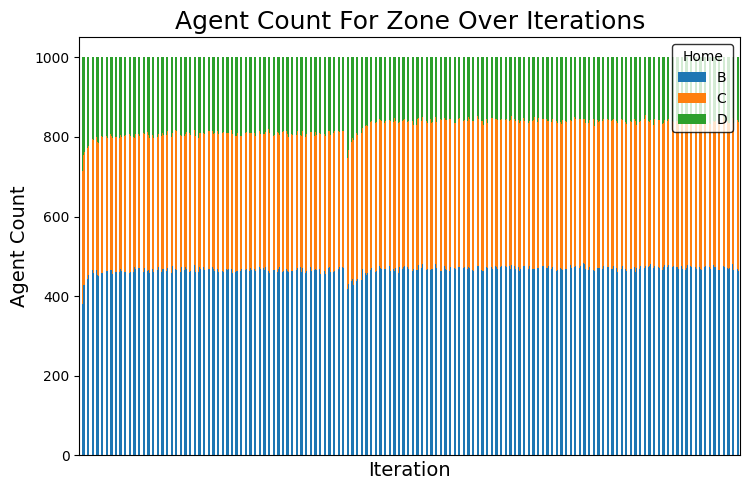

In [6]:
# 2. 반복별 구역당 에이전트 수 (막대 그래프) - x축 눈금 제거
df_zone_count = df.groupby(['Iteration', 'Home']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))
df_zone_count.plot(kind='bar', stacked=True, ax=ax, title="Agent Count For Zone Over Iterations")
ax.set_xlabel('Iteration')
ax.set_ylabel('Agent Count')
ax.set_xticks([])  # x축 눈금 제거 (반복 번호)

# 제목 폰트 크기만 변경
ax.title.set_fontsize(18)  # 제목 폰트 크기만 18로 설정

# x축 레이블 폰트 크기만 변경
ax.xaxis.label.set_fontsize(14)  # x축 레이블 폰트 크기만 14로 설정

# y축 레이블 폰트 크기만 변경
ax.yaxis.label.set_fontsize(14)  # y축 레이블 폰트 크기만 14로 설정

ax.legend(
    title='Home',
    loc='upper right',        # 그래프의 오른쪽 위
    bbox_to_anchor=(1, 1),    # 축 안쪽으로 위치 고정
    frameon=True,              # 범례에 테두리 추가
    facecolor='white',
    edgecolor='black'
)

plt.tight_layout()
plt.savefig('Agent Count For Zone Over Iterations.png', dpi=300, bbox_inches='tight')
plt.show()


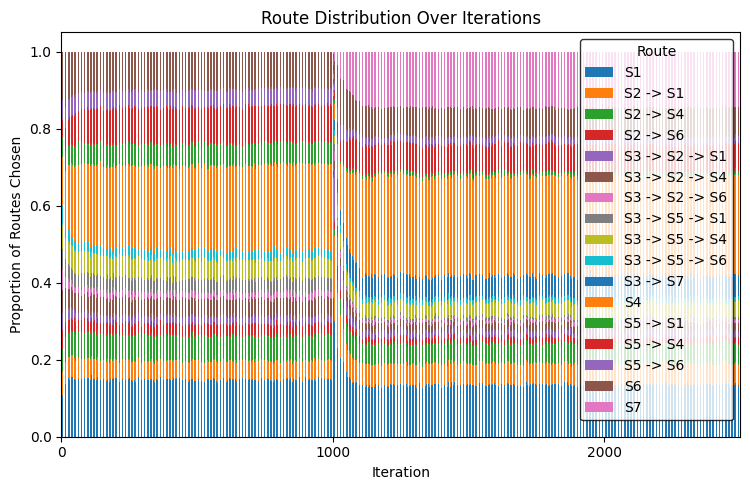

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# 넓은 그래프 크기 설정 (예: 24x8 인치)
#fig_width, fig_height = 24, 8

# Iteration마다 Route 분포 계산
df_route_distribution = df.groupby(['Iteration', 'Route']).size().unstack(fill_value=0)

# 각 Iteration에 대한 Route의 비율 계산
df_route_distribution_normalized = df_route_distribution.div(df_route_distribution.sum(axis=1), axis=0)

# 그래프 그리기 (fig_width와 fig_height 사용)
ax = df_route_distribution_normalized.plot(kind='bar', stacked=True, figsize=(fig_width, fig_height), title="Route Distribution Over Iterations")
plt.xlabel('Iteration')
plt.ylabel('Proportion of Routes Chosen')

# x축 레이블을 1000 간격으로 표시하고, 레이블을 가로로 회전
xticks = ax.get_xticks()
ax.set_xticks(xticks[::1000])  # 1000 간격으로 레이블 표시
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)  # 레이블을 가로로 회전
ax.legend(
    title='Route',
    loc='upper right',        # 그래프의 오른쪽 위
    bbox_to_anchor=(1, 1),    # 축 안쪽으로 위치 고정
    frameon=True,              # 범례에 테두리 추가
    facecolor='white',
    edgecolor='black'
)
plt.tight_layout()
plt.savefig('Route Distribution Over Iterations.png', dpi=300, bbox_inches='tight')
plt.show()

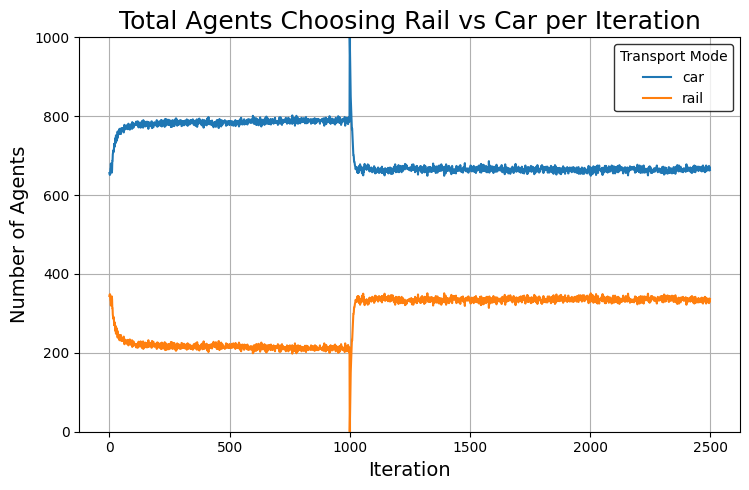

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# 예제 데이터 로드 (필요시 자신의 데이터 파일로 교체)
# df = pd.read_csv('your_data.csv')  # 파일에서 불러올 경우 주석 해제

# 넓은 그래프 크기 설정 (예: 24x8 인치)
#fig_width, fig_height = 24, 8

# 조건을 변수로 분리
RAIL_INDICATORS = ['S6', 'S7']  # Rail로 분류할 조건 문자열

# Route 열에서 RAIL_INDICATORS 포함 여부로 운송 모드를 분류
def classify_transport_mode(route):
    return 'rail' if any(indicator in route for indicator in RAIL_INDICATORS) else 'car'

df['Transport Mode'] = df['Route'].apply(classify_transport_mode)

# Iteration과 운송 모드별로 에이전트 수를 그룹화하여 계산
df_transport_mode = df.groupby(['Iteration', 'Transport Mode']).size().unstack(fill_value=0)

# 데이터 시각화
fig, ax = plt.subplots(figsize=(fig_width, fig_height))
df_transport_mode.plot(kind='line', title="Total Agents Choosing Rail vs Car per Iteration", ax=ax)
ax.set_xlabel('Iteration')
ax.set_ylabel('Number of Agents')
ax.set_ylim(0, 1000)  # y축을 0에서 1000으로 설정
ax.grid(True)

# 제목 폰트 크기만 변경
ax.title.set_fontsize(18)  # 제목 폰트 크기만 18로 설정

# x축 레이블 폰트 크기만 변경
ax.xaxis.label.set_fontsize(14)  # x축 레이블 폰트 크기만 14로 설정

# y축 레이블 폰트 크기만 변경
ax.yaxis.label.set_fontsize(14)  # y축 레이블 폰트 크기만 14로 설정

ax.legend(
    title='Transport Mode',
    loc='upper right',        # 그래프의 오른쪽 위
    bbox_to_anchor=(1, 1),    # 축 안쪽으로 위치 고정
    frameon=True,             # 범례에 테두리 추가
    facecolor='white',
    edgecolor='black'
)
plt.tight_layout()

# 그래프를 저장하고 표시
plt.savefig('Total Agents Choosing Transportation.png', dpi=300, bbox_inches='tight')
plt.show()

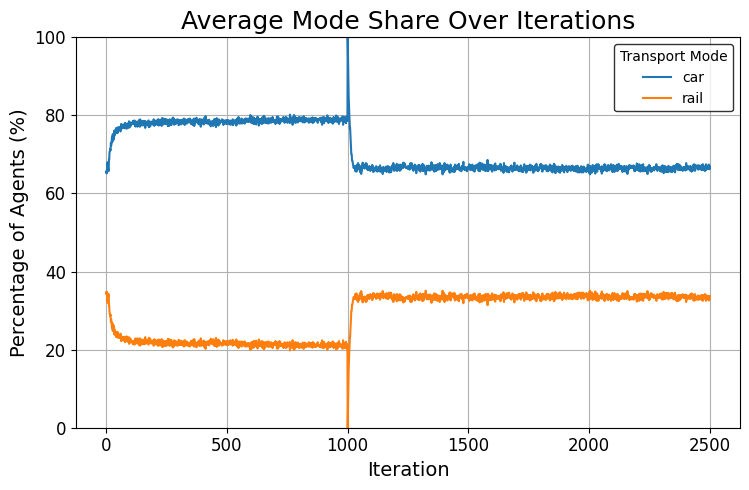

In [9]:
# 조건을 변수로 분리
RAIL_INDICATORS = ['S6', 'S7']  # Rail로 분류할 조건 문자열

# Route 열에서 RAIL_INDICATORS 포함 여부로 운송 모드를 분류
def classify_transport_mode(route):
    return 'rail' if any(indicator in route for indicator in RAIL_INDICATORS) else 'car'

df['Transport Mode'] = df['Route'].apply(classify_transport_mode)

# Iteration과 운송 모드별로 에이전트 수를 그룹화하여 평균 계산
df_transport_mode = df.groupby(['Iteration', 'Transport Mode']).size().unstack(fill_value=0)

# Iteration별 평균을 계산하기 위해 각 Iteration의 전체 에이전트 수로 나눔
df_transport_mode_average = df_transport_mode.div(df_transport_mode.sum(axis=1), axis=0) * 100

# 데이터 시각화
fig, ax = plt.subplots(figsize=(fig_width, fig_height))
df_transport_mode_average.plot(kind='line', title="Average Mode Share Over Iterations", ax=ax)
ax.set_xlabel('Iteration')
ax.set_ylabel('Percentage of Agents (%)')
ax.set_ylim(0, 100)  # y축을 0에서 100%로 설정
ax.grid(True)

# 제목 폰트 크기만 변경
ax.title.set_fontsize(18)  # 제목 폰트 크기만 18로 설정

# x축 레이블 폰트 크기만 변경
ax.xaxis.label.set_fontsize(14)  # x축 레이블 폰트 크기만 14로 설정

# y축 레이블 폰트 크기만 변경
ax.yaxis.label.set_fontsize(14)  # y축 레이블 폰트 크기만 14로 설정

# x, y축 tick 레이블 크기만 조정
ax.tick_params(axis='both', labelsize=12)  # x, y축 tick 레이블 크기만 설정

# 범례 설정
ax.legend(
    title='Transport Mode',
    loc='upper right',
    bbox_to_anchor=(1, 1),
    frameon=True,
    facecolor='white',
    edgecolor='black'
)

plt.tight_layout()

# 그래프를 저장하고 표시
plt.savefig('Average Mode Share Over Iterations.png', dpi=300, bbox_inches='tight')
plt.show()

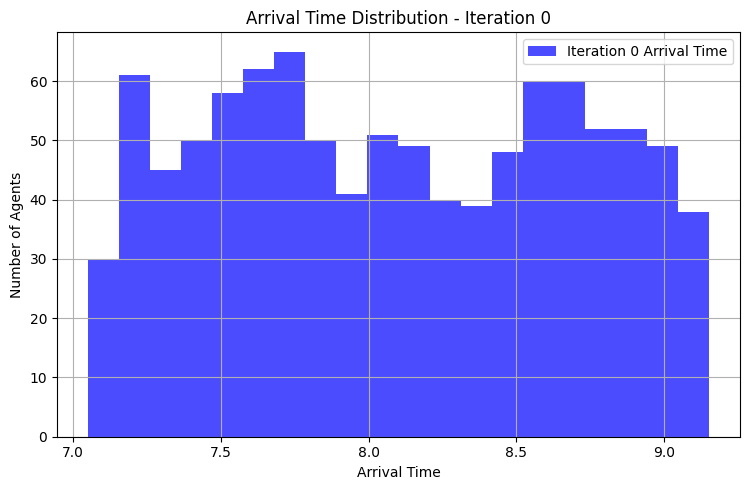

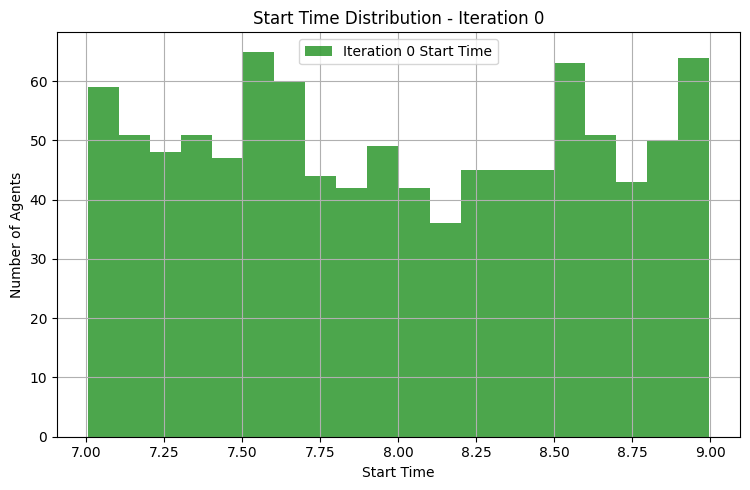

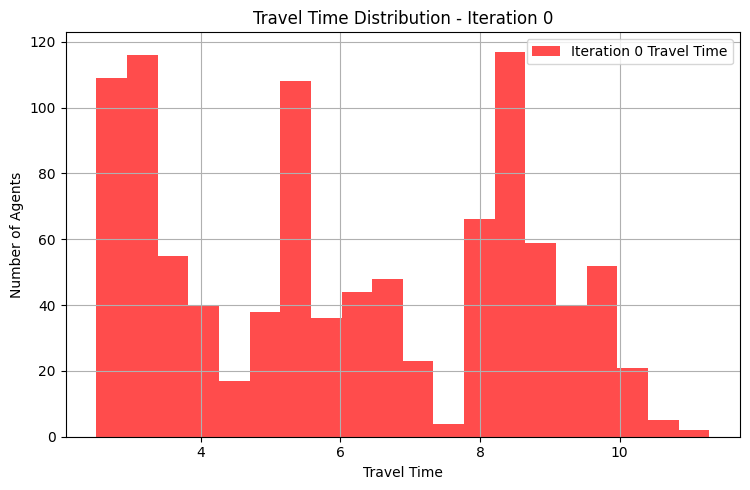

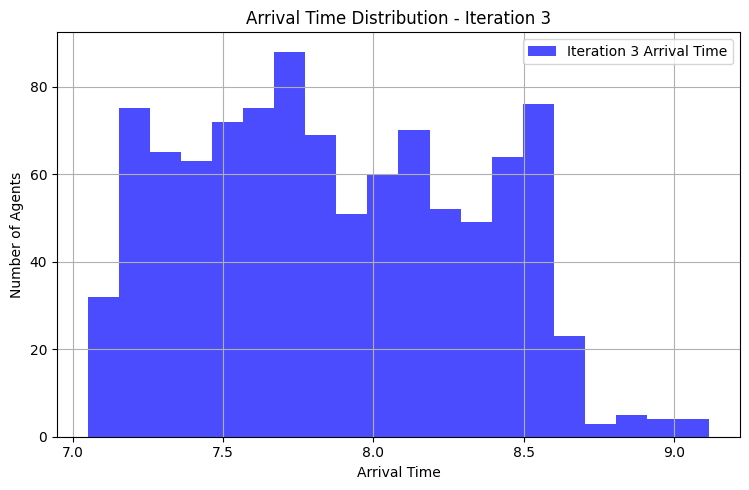

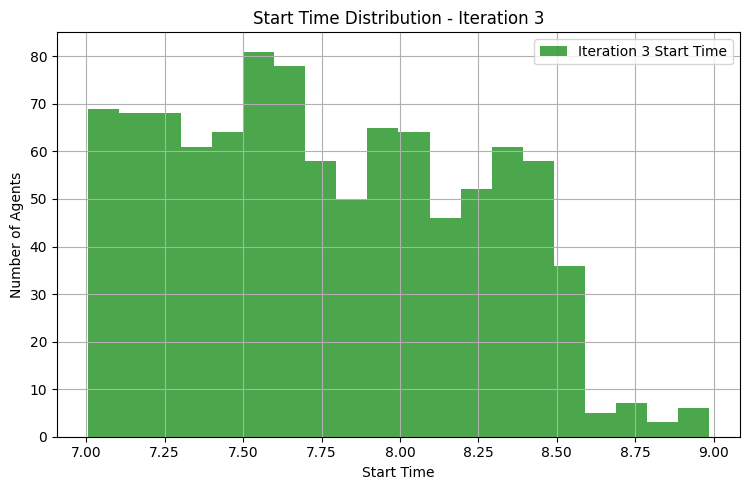

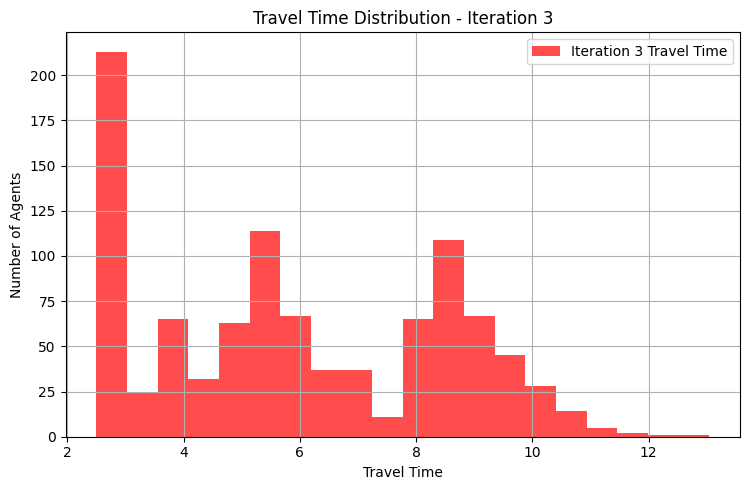

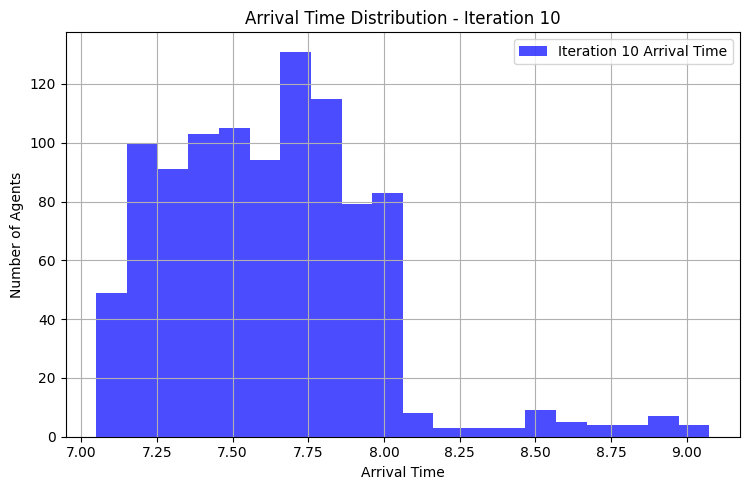

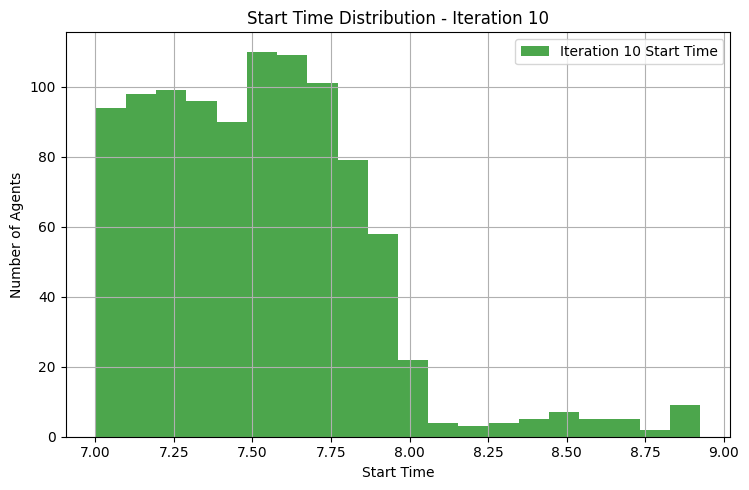

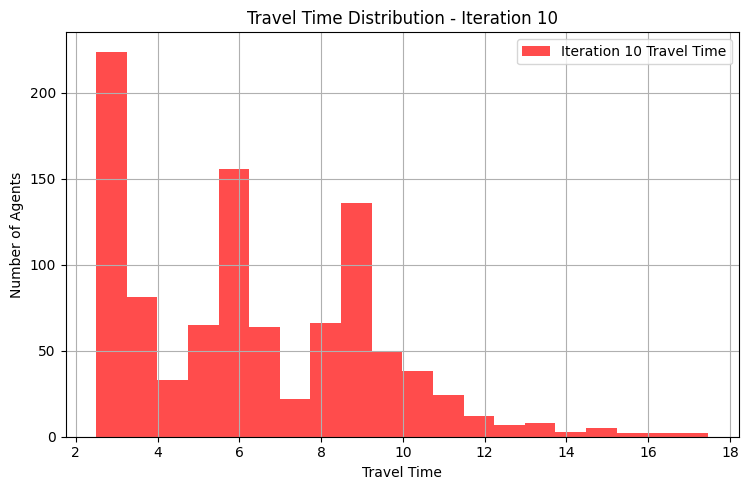

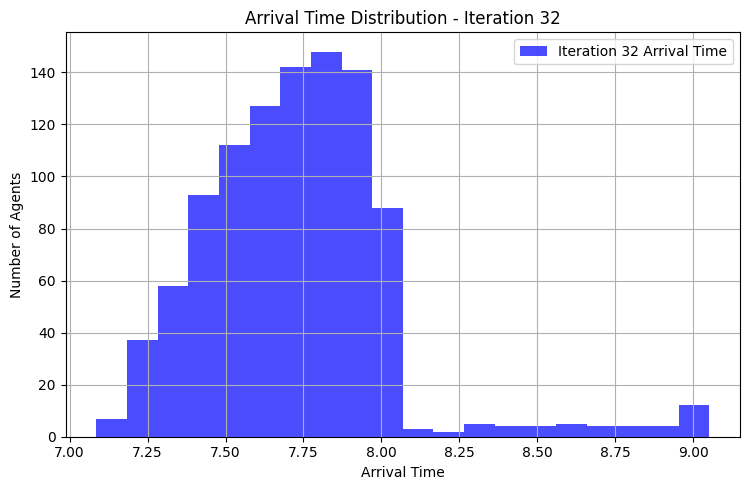

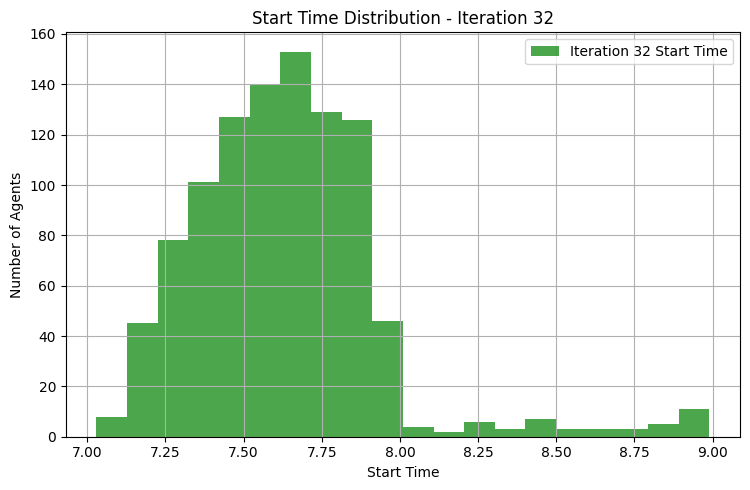

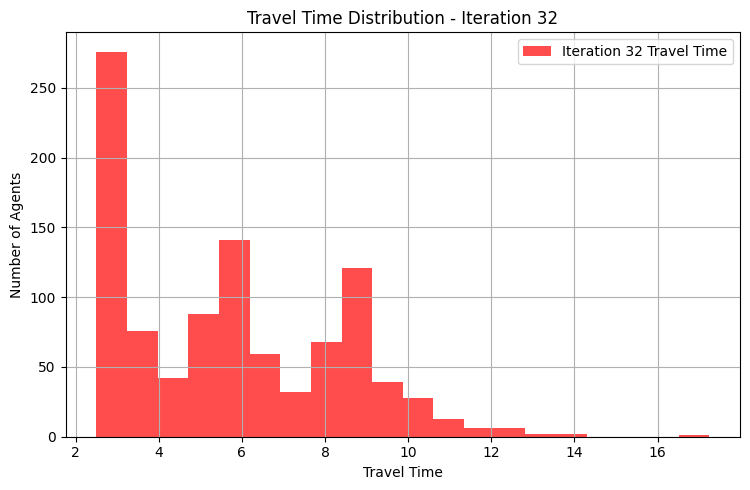

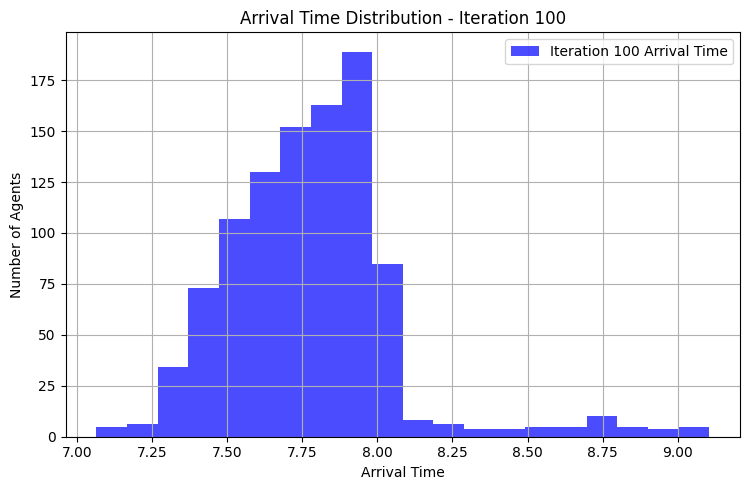

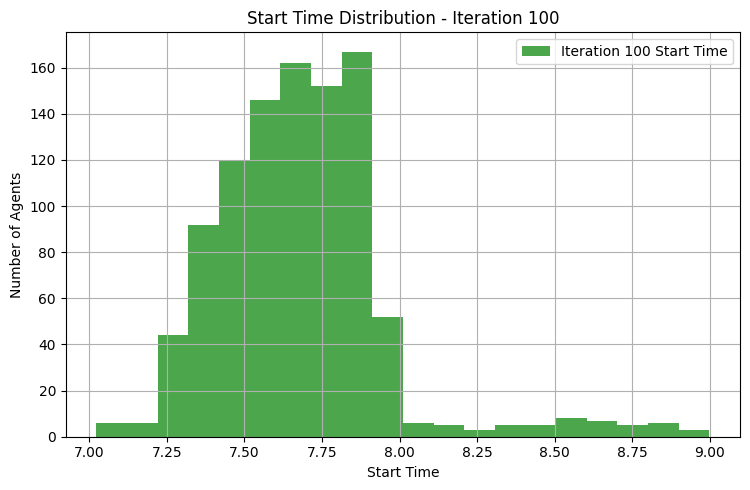

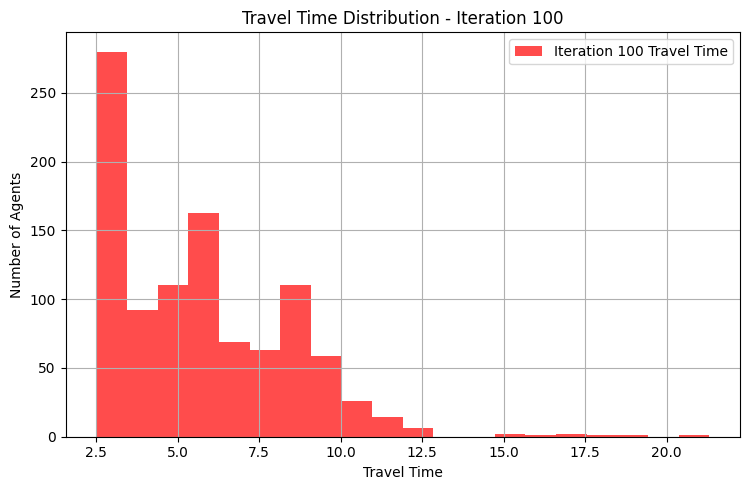

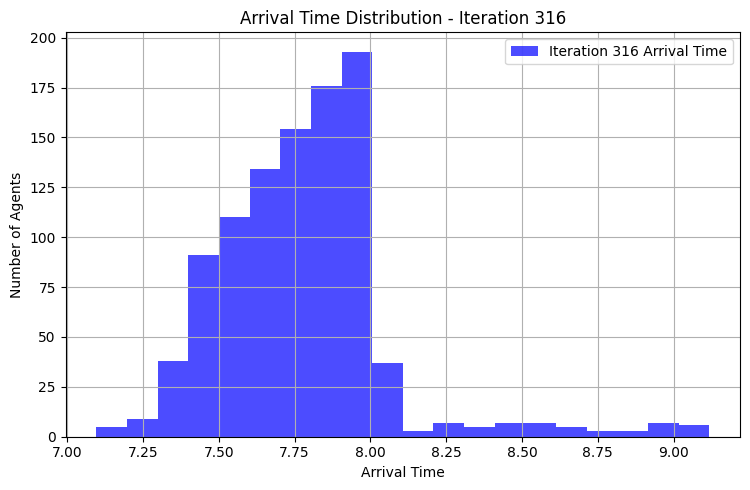

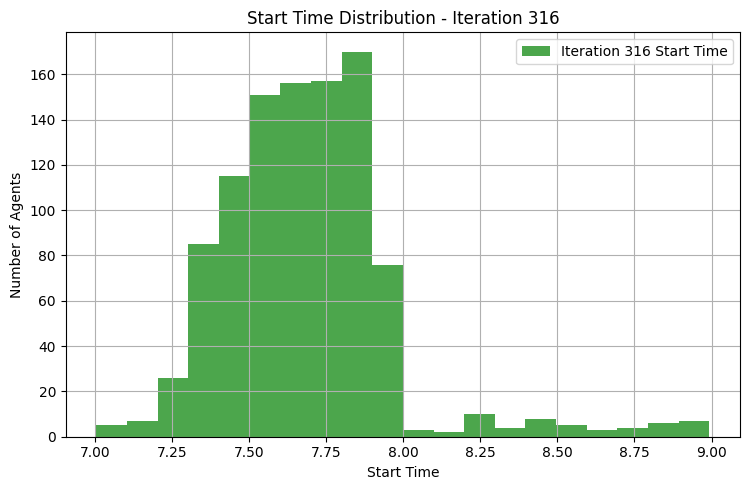

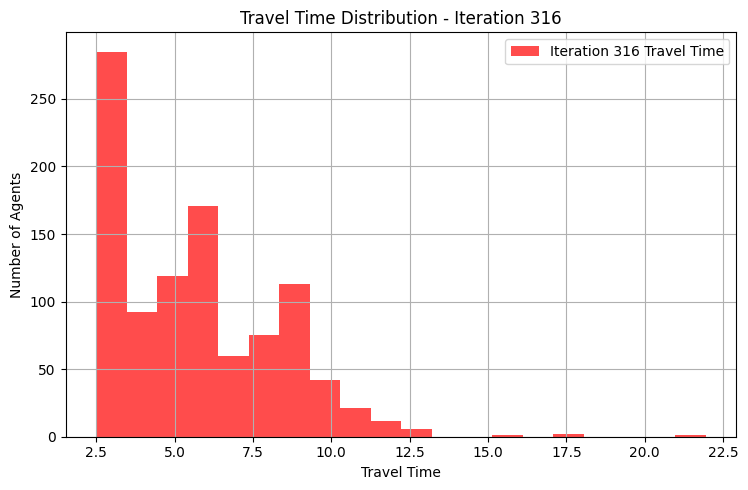

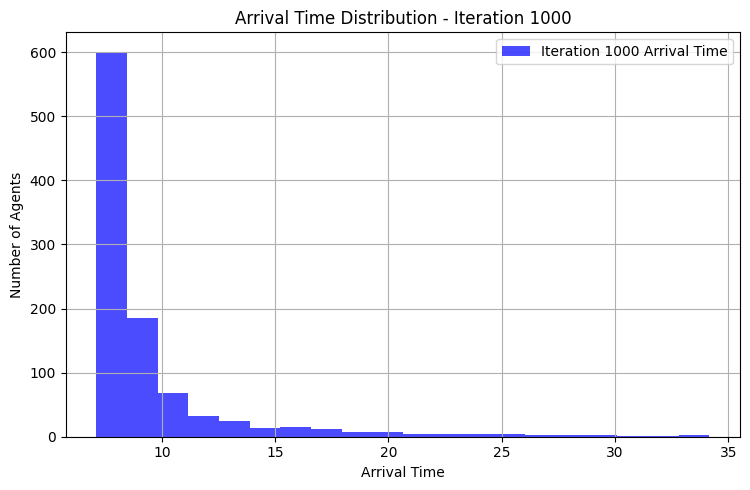

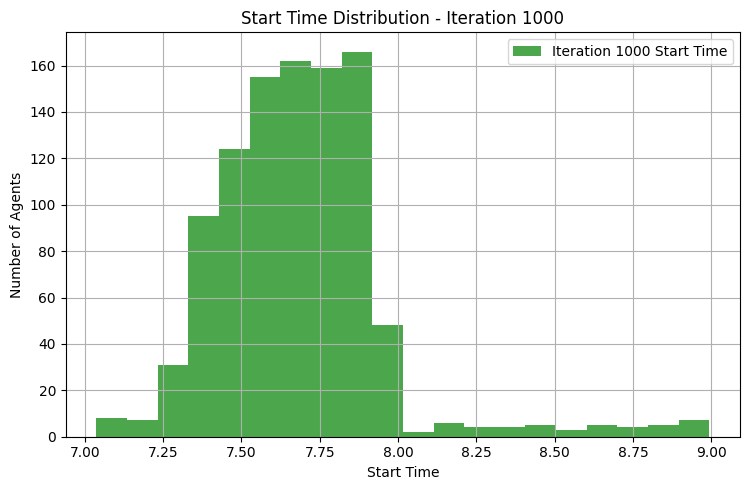

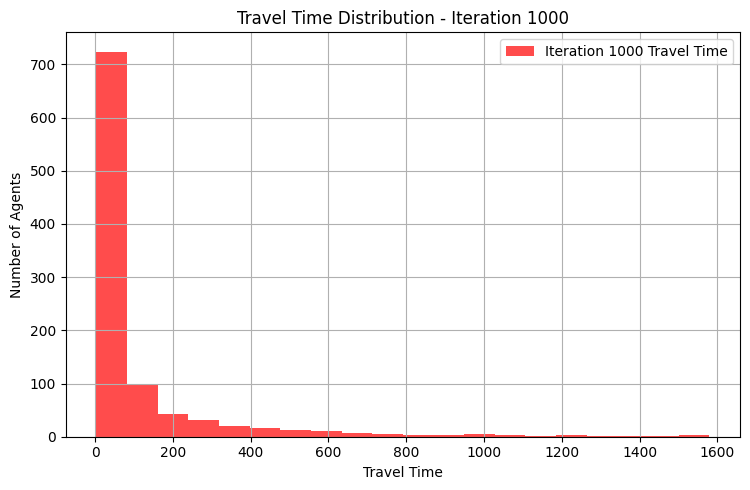

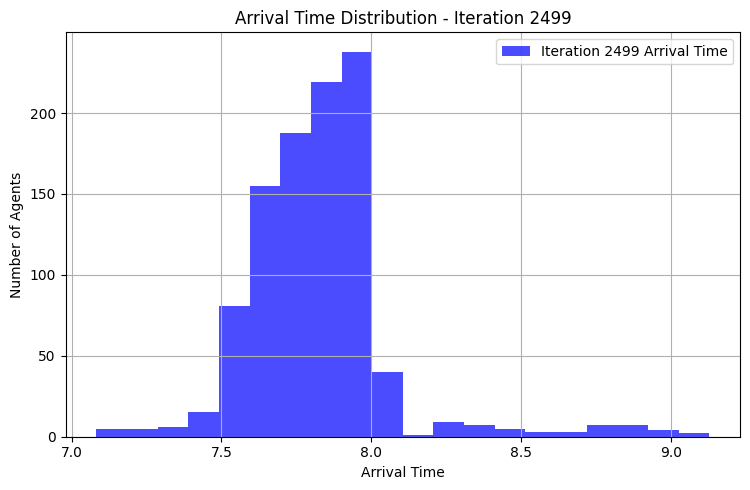

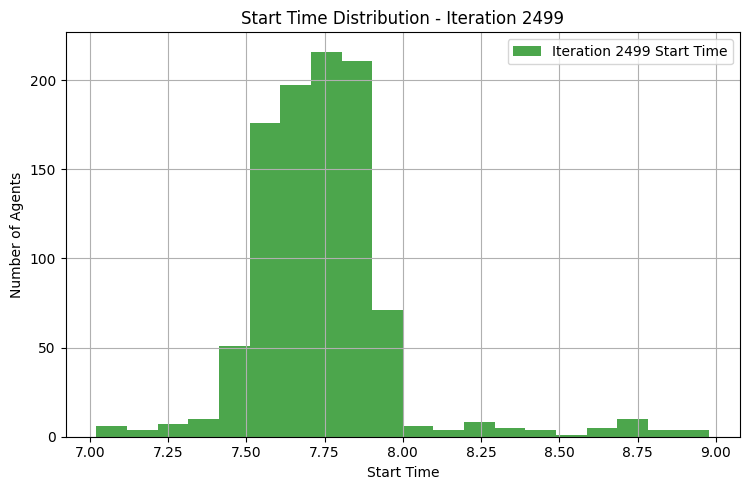

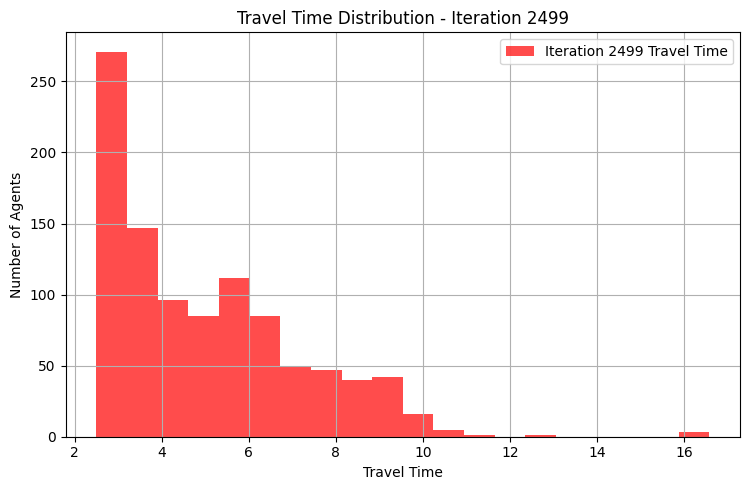

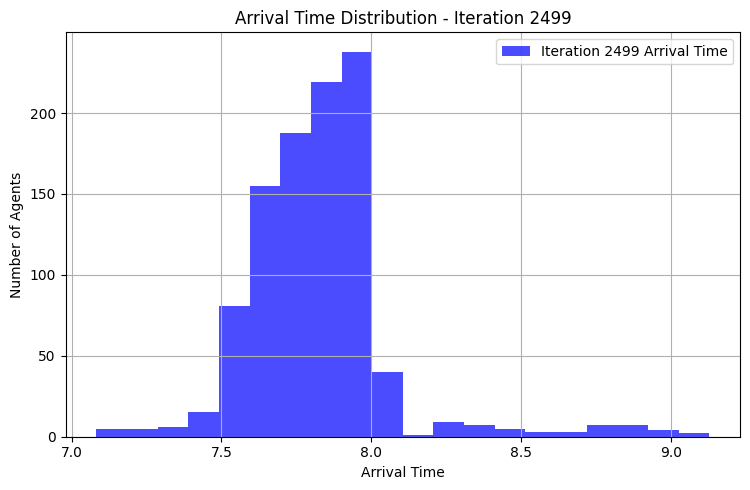

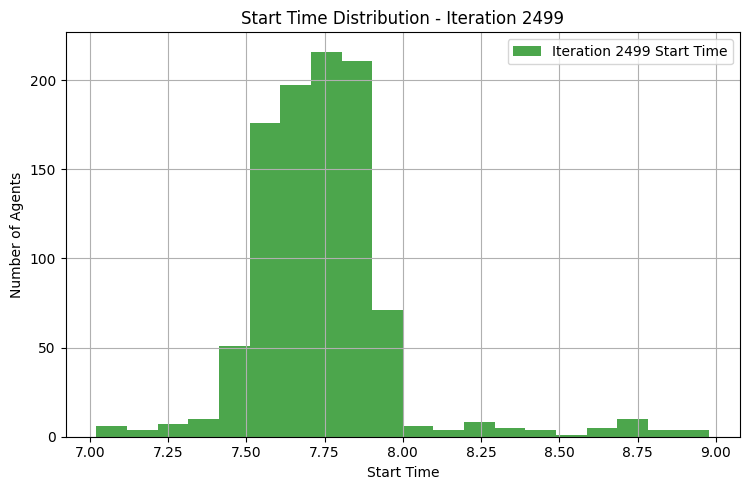

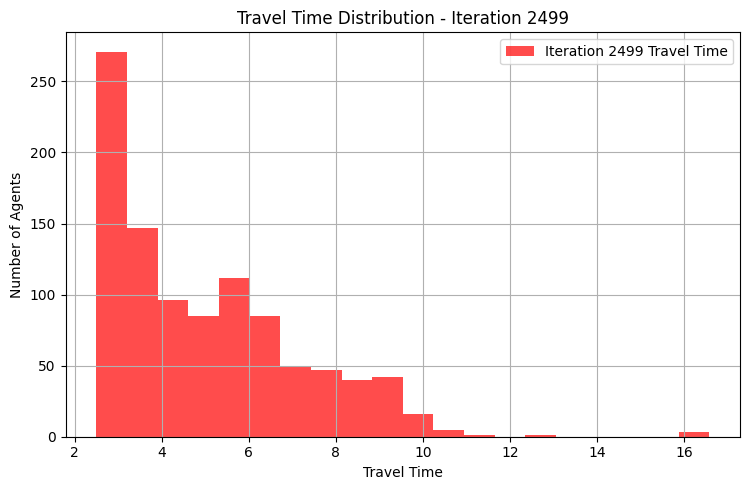

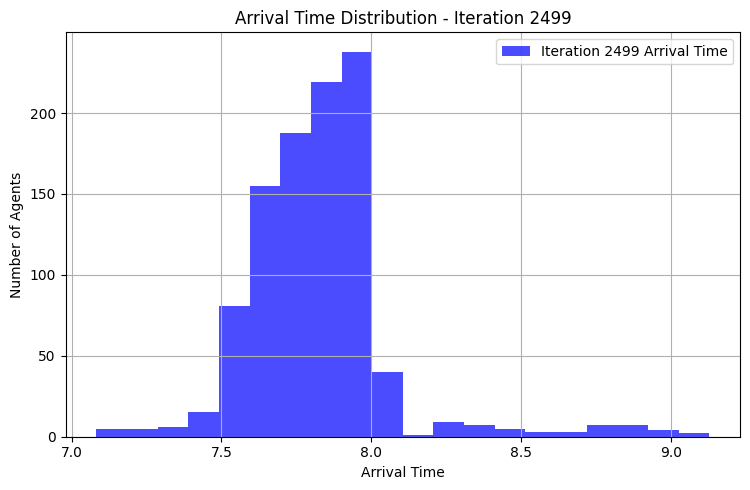

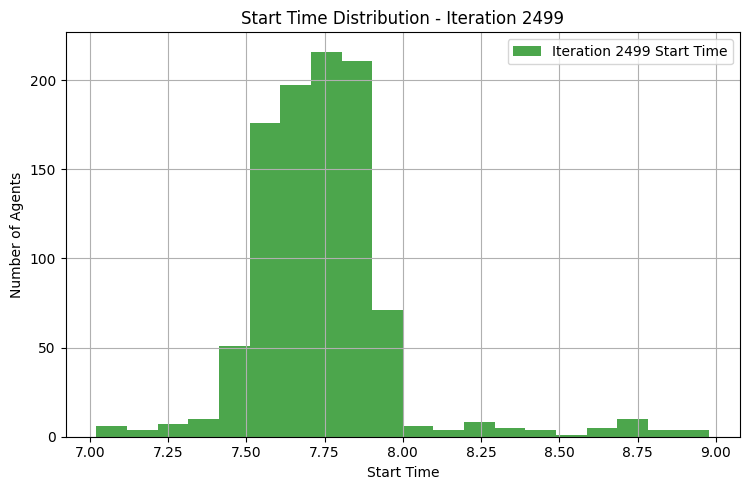

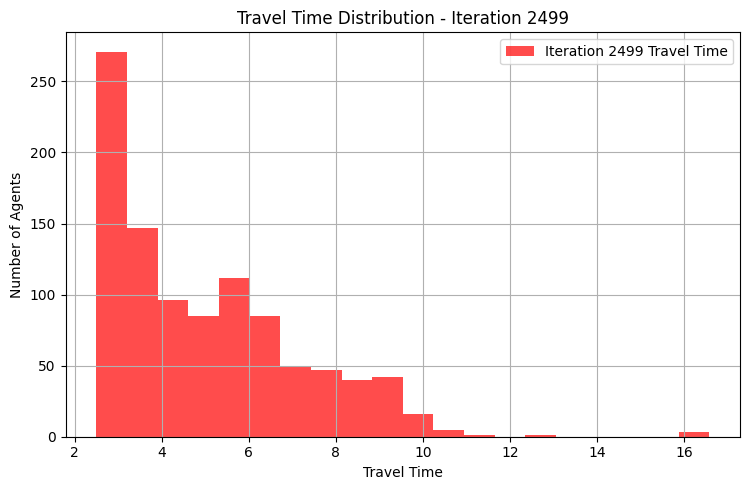

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 예제 데이터 로드 (필요시 자신의 데이터 파일로 교체)
# df = pd.read_csv('your_data.csv')  # 파일에서 불러올 경우 주석 해제

# 도착 시간을 계산 (출발 시간 + 이동 시간)
df['Arrival Time'] = df['Start Time'] + (df['Travel Time'] / 60)

# 총 Iteration의 최대값과 그에 따른 반복 횟수 설정
total_iterations = df['Iteration'].max()
num_plots = 10  # 출력할 횟수

# 지수적으로 증가하는 Iteration 값 생성
iteration_points = [0] + [int(min(total_iterations, round(10 ** (i / 2)))) for i in range(1, num_plots)]

# 지수적으로 증가하는 간격에 따라 히스토그램 생성
for i in iteration_points:
    # 해당 Iteration에 대한 데이터 필터링
    df_iter = df[df['Iteration'] == i]
    
    # 도착 시간 분포 히스토그램
    plt.figure(figsize=(fig_width, fig_height))
    plt.hist(df_iter['Arrival Time'], bins=20, alpha=0.7, color='blue', label=f'Iteration {i} Arrival Time')
    plt.xlabel('Arrival Time')
    plt.ylabel('Number of Agents')
    plt.title(f'Arrival Time Distribution - Iteration {i}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'iteration_{i}_arrival_time_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

    # 출발 시간 분포 히스토그램
    plt.figure(figsize=(fig_width, fig_height))
    plt.hist(df_iter['Start Time'], bins=20, alpha=0.7, color='green', label=f'Iteration {i} Start Time')
    plt.xlabel('Start Time')
    plt.ylabel('Number of Agents')
    plt.title(f'Start Time Distribution - Iteration {i}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'iteration_{i}_start_time_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

    # 이동 시간 분포 히스토그램
    plt.figure(figsize=(fig_width, fig_height))
    plt.hist(df_iter['Travel Time'], bins=20, alpha=0.7, color='red', label=f'Iteration {i} Travel Time')
    plt.xlabel('Travel Time')
    plt.ylabel('Number of Agents')
    plt.title(f'Travel Time Distribution - Iteration {i}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'iteration_{i}_travel_time_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()


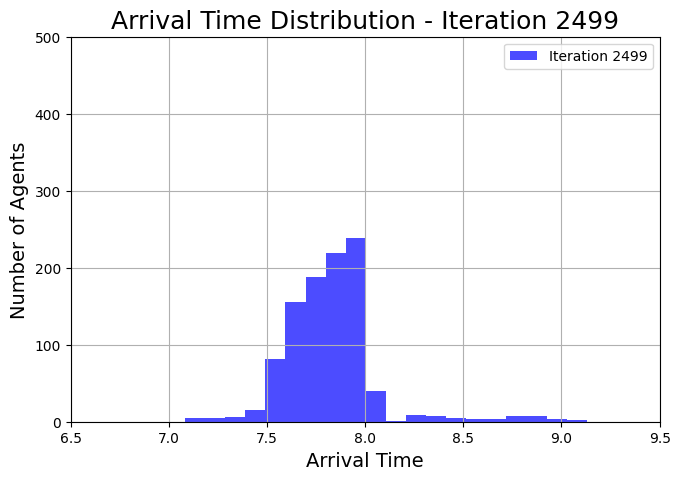

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.animation import FuncAnimation
from matplotlib.animation import HTMLWriter
import matplotlib

#matplotlib.use('TkAgg')  # TkAgg 백엔드 설정


df['Arrival Time'] = df['Start Time'] + (df['Travel Time'] / 60)

# Iteration 범위 가져오기
iteration_points = sorted(df['Iteration'].unique())  # 고유한 Iteration 값 정렬

# 애니메이션 설정
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

def update(iteration):
    ax.clear()  # 이전 데이터를 지우고 새 데이터를 그림
    df_iter = df[df['Iteration'] == iteration]
    ax.hist(df_iter['Arrival Time'], bins=20, alpha=0.7, color='blue', label=f'Iteration {iteration}')
    ax.set_title(f'Arrival Time Distribution - Iteration {iteration}')
    ax.set_xlabel('Arrival Time')
    ax.set_ylabel('Number of Agents')
    ax.set_ylim(0, 500)  # 데이터에 맞게 y축 조정
    ax.set_xlim(6.5, 9.5)  # x축 범위 설정
    ax.legend(loc='upper right')
    ax.grid(True)
    # 제목 폰트 크기만 변경
    ax.title.set_fontsize(18)  # 제목 폰트 크기만 18로 설정

    # x축 레이블 폰트 크기만 변경
    ax.xaxis.label.set_fontsize(14)  # x축 레이블 폰트 크기만 14로 설정
    
    # y축 레이블 폰트 크기만 변경
    ax.yaxis.label.set_fontsize(14)  # y축 레이블 폰트 크기만 14로 설정

# 애니메이션 생성 및 저장
ani = FuncAnimation(fig, update, frames=iteration_points, interval=2000, repeat=True)

# HTMLWriter를 이용해 HTML5 비디오로 저장
html_writer = HTMLWriter()
ani.save('arrival_time_distribution.html', writer=html_writer)

plt.show()

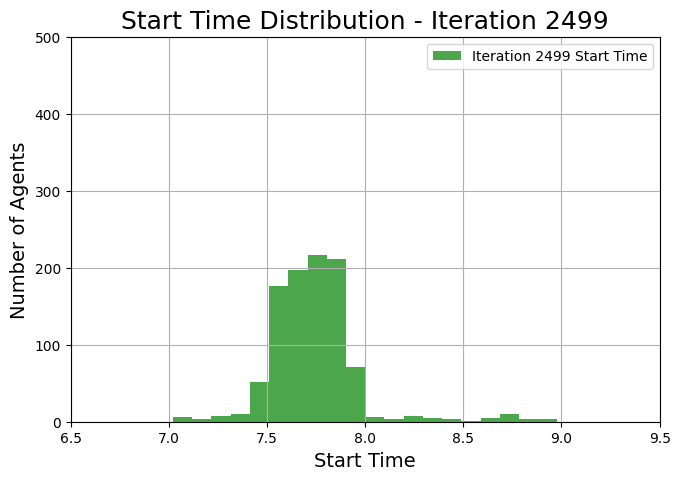

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.animation import FuncAnimation, HTMLWriter
import matplotlib
#matplotlib.use('TkAgg')  # 애니메이션 실행을 위한 TkAgg 백엔드 설정


# Iteration 범위 추출
iteration_points = sorted(df['Iteration'].unique())  # 고유한 Iteration 값을 정렬

# 애니메이션 설정
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

def update(iteration):
    ax.clear()  # 이전 데이터를 지우고 새 데이터를 그림
    df_iter = df[df['Iteration'] == iteration]
    ax.hist(df_iter['Start Time'], bins=20, alpha=0.7, color='green', label=f'Iteration {iteration} Start Time')
    ax.set_title(f'Start Time Distribution - Iteration {iteration}')
    ax.set_xlabel('Start Time')
    ax.set_ylabel('Number of Agents')
    ax.set_ylim(0, 500)  # y축 범위를 0~40으로 고정
    ax.set_xlim(6.5, 9.5) 
    ax.legend(loc='upper right')  # 범례를 그래프 오른쪽 위로 고정
    ax.grid(True)
    # 제목 폰트 크기만 변경
    ax.title.set_fontsize(18)  # 제목 폰트 크기만 18로 설정
    
    # x축 레이블 폰트 크기만 변경
    ax.xaxis.label.set_fontsize(14)  # x축 레이블 폰트 크기만 14로 설정
    
    # y축 레이블 폰트 크기만 변경
    ax.yaxis.label.set_fontsize(14)  # y축 레이블 폰트 크기만 14로 설정
    
# 애니메이션 생성
# interval=2000: 프레임 간 2초 딜레이
ani = FuncAnimation(fig, update, frames=iteration_points, interval=2000, repeat=True)

# HTMLWriter를 이용해 HTML5 비디오로 저장
writer = HTMLWriter()
ani.save('start_time_distribution_slow.html', writer=writer)

plt.show()


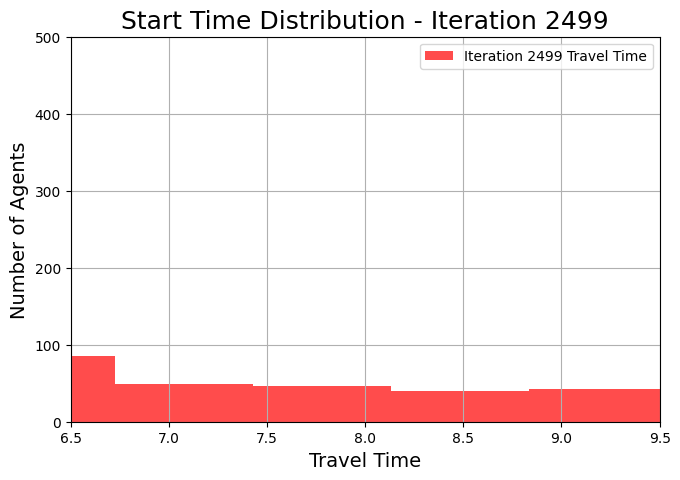

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.animation import FuncAnimation, HTMLWriter
import matplotlib
#matplotlib.use('TkAgg')  # 애니메이션 실행을 위한 TkAgg 백엔드 설정


# Iteration 범위 추출
iteration_points = sorted(df['Iteration'].unique())  # 고유한 Iteration 값을 정렬

# 애니메이션 설정
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

def update(iteration):
    ax.clear()  # 이전 데이터를 지우고 새 데이터를 그림
    df_iter = df[df['Iteration'] == iteration]
    ax.hist(df_iter['Travel Time'], bins=20, alpha=0.7, color='red', label=f'Iteration {iteration} Travel Time')
    ax.set_title(f'Start Time Distribution - Iteration {iteration}')
    ax.set_xlabel('Travel Time')
    ax.set_ylabel('Number of Agents')
    ax.set_ylim(0, 500)  # y축 범위를 0~40으로 고정
    ax.set_xlim(6.5, 9.5) 
    ax.legend(loc='upper right')  # 범례를 그래프 오른쪽 위로 고정
    ax.grid(True)
    # 제목 폰트 크기만 변경
    ax.title.set_fontsize(18)  # 제목 폰트 크기만 18로 설정
    
    # x축 레이블 폰트 크기만 변경
    ax.xaxis.label.set_fontsize(14)  # x축 레이블 폰트 크기만 14로 설정
    
    # y축 레이블 폰트 크기만 변경
    ax.yaxis.label.set_fontsize(14)  # y축 레이블 폰트 크기만 14로 설정

# 애니메이션 생성
# interval=2000: 프레임 간 2초 딜레이
ani = FuncAnimation(fig, update, frames=iteration_points, interval=2000, repeat=True)

# HTMLWriter를 이용해 HTML5 비디오로 저장
writer = HTMLWriter()
ani.save('travel_time_distribution_slow.html', writer=writer)

plt.show()

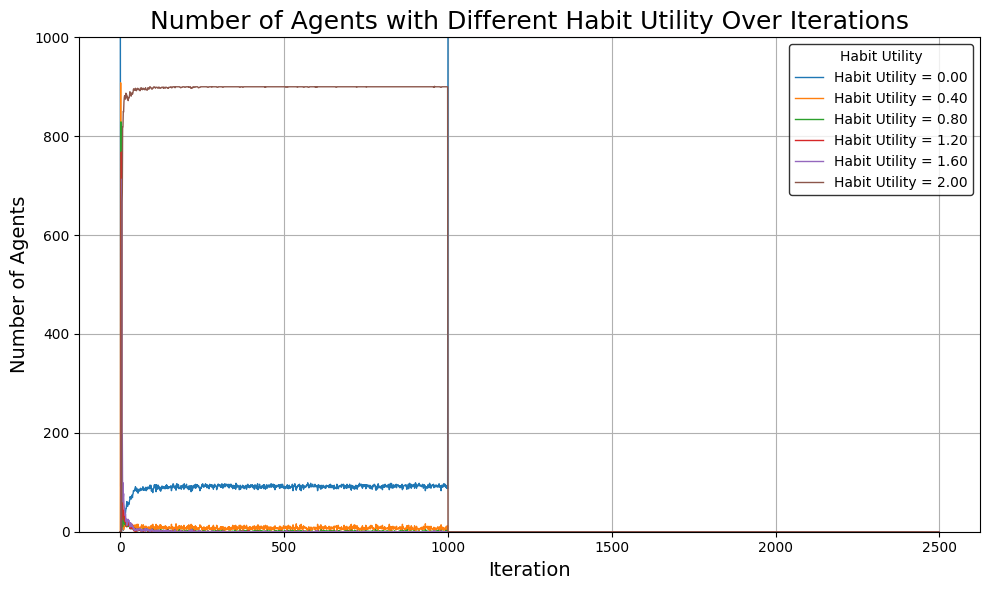

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 예시 데이터
# df = pd.read_csv('your_data.csv')  # 실제 데이터 읽기

# beta_k와 number 설정
beta_k = 0.4
number = 5

# beta_k * 1, beta_k * 2, ..., beta_k * number 계산
habit_utilities = [beta_k * i for i in range(0, number + 1)]

# Iteration 전체 범위를 계산
min_iteration = df["Iteration"].min()
max_iteration = df["Iteration"].max()

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))

# y축 범위 설정
ax.set_ylim(0, 1000)

# 각 beta_k * i에 대한 그래프 그리기
for utility in habit_utilities:
    # Habit Utility 값 근사 비교를 사용해 필터링
    filtered_data = df[np.isclose(df["Habit Utility"], utility, atol=1e-5)]
    
    # Iteration별로 해당 Habit Utility를 가진 agent들의 수 계산
    agent_count = filtered_data.groupby("Iteration").size()
    
    # Iteration 전체 범위 보장, 누락된 Iteration은 0으로 채움
    agent_count = agent_count.reindex(range(min_iteration, max_iteration + 1), fill_value=0)
    
    # 그래프 추가
    ax.plot(agent_count.index, agent_count.values, label=f'Habit Utility = {utility:.2f}', linestyle='-', linewidth=1)

# 그래프 설정
ax.set_title("Number of Agents with Different Habit Utility Over Iterations", fontsize=18)
ax.set_xlabel("Iteration", fontsize=14)
ax.set_ylabel("Number of Agents", fontsize=14)
ax.grid(True)

# 범례 설정
ax.legend(title='Habit Utility', loc='upper right', bbox_to_anchor=(1, 1), frameon=True, facecolor='white', edgecolor='black')

# 레이아웃 조정
plt.tight_layout()

# 그래프 저장 및 표시
plt.savefig('Number_of_Agents_with_Habit_Utility.png', dpi=300, bbox_inches='tight')
plt.show()

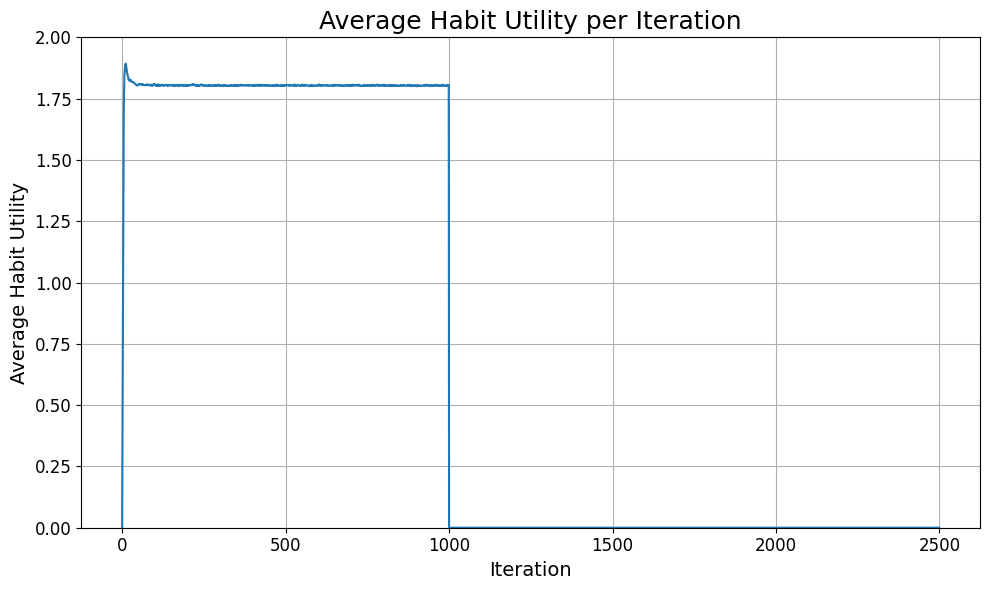

In [15]:

# Calculate average Habit Utility per Iteration
average_habit_utility = df.groupby("Iteration")["Habit Utility"].mean()

# Plot the graph
fig, ax = plt.subplots(figsize=(10, 6))
average_habit_utility.plot(
    kind="line",
    title="Average Habit Utility per Iteration",
    ax=ax
)

# Graph title and labels
ax.set_title("Average Habit Utility per Iteration", fontsize=18)
ax.set_xlabel("Iteration", fontsize=14)
ax.set_ylabel("Average Habit Utility", fontsize=14)
ax.set_ylim(0, 2)  # Set y-axis range

# Adjust tick label size
ax.tick_params(axis='both', labelsize=12)

# Add grid lines
ax.grid(True)

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('Average_Habit_Utility_per_Iteration.png', dpi=300, bbox_inches='tight')
plt.show()
